In [3]:
%matplotlib notebook

In [4]:
def tutte_barycentric_layout(graph, h):
    import numpy as np
    l = len(graph)
    W = np.zeros(shape=(l, l), dtype='float')
    F = np.array([[np.cos(j*2*np.pi / h), -np.sin(j*2*np.pi / h)] for j in range(h)])
    for i, neighbors in graph.iteritems():
        for j in graph.keys():
            if i == j:
                W[i, j] = len(neighbors)   
            else:
                W[i, j] = -1.0 if j in neighbors else 0.0
    B = np.matmul(W,np.pad(F, (0, l-h), 'constant'))
    return np.concatenate((F, np.linalg.solve(W[h:,h:], -B[h:,0:2])))

In [5]:
import matplotlib
from matplotlib import pyplot as plt

In [6]:
graph = {
         0 :[1, 2, 3],
         1 :[0, 4, 9],
         2 :[0, 5, 6],
         3 :[0, 7, 8],
         4 :[1, 5, 11],
         5 :[2, 4, 12],
         6 :[2, 7, 13],
         7 :[3, 6, 14],
         8 :[3, 9, 15],
         9 :[1, 8, 10],
         10 :[18, 11, 9],
         11 :[16, 10, 4],
         12 :[16, 13, 5],
         13 :[17, 12, 6],
         14 :[17, 15, 7],
         15 :[18, 14, 8],
         16 :[11, 12, 19],
         17 :[13, 14, 19],
         18 :[15, 10, 19],
         19 :[18, 17, 16]
     }

In [7]:
P = tutte_barycentric_layout(graph, 5)

In [8]:
P.shape

(20, 2)

In [9]:
from itertools import chain
edges = list(chain(*[[(a, b) for b in mems] for a, mems in graph.iteritems()]))

In [10]:
import numpy as np

In [11]:
def normalize(V):
    norm = np.linalg.norm(V)
    return V / norm if norm > 0 else V

In [12]:
def normalize_all(V):
    normalizer = np.linalg.norm(V, axis=1)
    normalizer[normalizer == 0] = 1
    return V / np.expand_dims(normalizer, 1)

In [51]:
def generation(graph, vectors):
    next_gen = {}
    l = len(vectors)
    for i in range(l):
        neigbors = graph.get(i)
        v = vectors[i, :]
        next_vec = v
        forces = np.array([[0, 0, 0]])
        for j in range(l):
            next_vec = next_vec + (vectors[j, :] - v) * 0.33
        for j in neigbors:
            forces = forces + (vectors[j, :] - v) * -0.1
        next_gen[i] = vectors[i, :] + forces
    
    next_gen_mat = np.array([next_gen[i] for i in range(l)]).reshape((l,3))    
    next_gen_mat = normalize_all(next_gen_mat)
    return next_gen_mat

In [52]:
generation(graph, vectors)

array([[  3.09262311e-01,   8.45026249e-01,   4.36219511e-01],
       [  2.35852493e-01,   5.72161522e-01,   7.85496527e-01],
       [  7.68811977e-01,   5.23879924e-01,   3.66712380e-01],
       [  2.83988411e-01,   6.46441090e-01,   7.08141582e-01],
       [  3.29518894e-01,   6.86407822e-01,   6.48275867e-01],
       [  9.83804417e-01,  -1.72176525e-01,  -4.98408715e-02],
       [  9.92218069e-01,   5.23941982e-02,   1.12951987e-01],
       [  9.95566243e-01,   1.05993031e-02,  -9.34639544e-02],
       [  3.44518965e-01,  -4.80851704e-04,   9.38779235e-01],
       [  9.25587463e-01,  -3.71292835e-02,   3.76708461e-01],
       [  9.98566802e-01,  -5.31082991e-02,  -6.62201300e-03],
       [ -7.12936099e-02,   4.23042710e-01,   9.03300662e-01],
       [  6.33762058e-01,   5.50744169e-01,   5.43163432e-01],
       [ -2.30398898e-02,   9.92736582e-01,   1.18081509e-01],
       [  7.31774588e-01,   4.85575242e-01,   4.78249555e-01],
       [ -1.69777955e-01,   9.81512251e-01,  -8.8369375

In [15]:
import numpy
vectors = np.concatenate((P, np.expand_dims(np.sqrt(1 - (P[:, 0] * P[:, 0] + P[:, 1] * P[:, 1]) ), 1)), axis=1)
#vectors = numpy.random.rand(20,3)
normals = normalize_all(np.random.normal(size=(len(graph), 3))) / 4

<IPython.core.display.Javascript object>


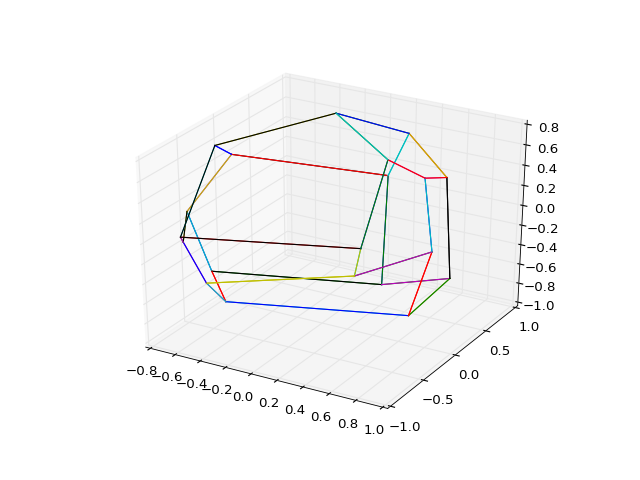

array([[-0.35509654, -0.91829207, -0.17506035],
       [-0.64846426, -0.72296894,  0.23834851],
       [ 0.7741083 , -0.624603  , -0.10308944],
       [-0.34642338, -0.75653178, -0.55466252],
       [-0.41415594, -0.50253728,  0.75890127],
       [ 0.62867595, -0.25654829,  0.73413182],
       [ 0.9437921 ,  0.07445533, -0.32204485],
       [ 0.70342887, -0.06006032, -0.70822354],
       [-0.6402677 , -0.51036088, -0.57409847],
       [-0.69052652, -0.71917543, -0.07719992],
       [-0.74252671, -0.66650177, -0.06655427],
       [-0.66940995, -0.2823655 ,  0.68713903],
       [ 0.36937804,  0.58373058,  0.72306187],
       [ 0.57370625,  0.77463629,  0.26608224],
       [ 0.50208502,  0.71755569, -0.48272609],
       [-0.03414735,  0.5652519 , -0.82421129],
       [-0.20896643,  0.61583623,  0.75965701],
       [ 0.33065223,  0.93530146,  0.12601702],
       [-0.08437104,  0.76245602, -0.64151566],
       [ 0.01712046,  0.97752234,  0.21013559]])

In [26]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cursor = vectors
for i in range(100):
    cursor = generation(graph, cursor)
for (a, b) in edges:
    plt.plot(cursor[[a,b],0],cursor[[a,b],1],cursor[[a,b],2])
plt.show()
cursor

In [22]:
graph

{0: [1, 2, 3],
 1: [0, 4, 9],
 2: [0, 5, 6],
 3: [0, 7, 8],
 4: [1, 5, 11],
 5: [2, 4, 12],
 6: [2, 7, 13],
 7: [3, 6, 14],
 8: [3, 9, 15],
 9: [1, 8, 10],
 10: [18, 11, 9],
 11: [16, 10, 4],
 12: [16, 13, 5],
 13: [17, 12, 6],
 14: [17, 15, 7],
 15: [18, 14, 8],
 16: [11, 12, 19],
 17: [13, 14, 19],
 18: [15, 10, 19],
 19: [18, 17, 16]}

In [77]:
(S,V,D) = np.linalg.svd(cursor)


In [78]:
V

array([  2.93160397e-04,   1.57581384e-04,   1.85223647e-05])

In [70]:
V

array([ 0.01722233,  0.00925745,  0.00108814])

In [71]:
V[1:] - V[0:1]

array([-0.00796488, -0.01613419])

In [82]:
(S, V, D)

(array([[ 0.00940548,  0.10948352, -0.19474316, ..., -0.1560855 ,
          0.09660519,  0.13353669],
        [ 0.0780199 ,  0.14176645, -0.15432166, ..., -0.10673879,
         -0.11235229, -0.0242868 ],
        [ 0.05012586,  0.1964904 , -0.09422815, ...,  0.11610626,
          0.17246868,  0.18270649],
        ..., 
        [ 0.09008384,  0.16193877,  0.12514278, ...,  0.94678015,
         -0.01858621, -0.0046614 ],
        [ 0.14153943, -0.09014227,  0.14778685, ..., -0.02216641,
          0.95277265, -0.03931332],
        [ 0.06089461, -0.14425553,  0.15963136, ..., -0.00862363,
         -0.04159376,  0.95826245]]),
 array([  2.93160397e-04,   1.57581384e-04,   1.85223647e-05]),
 array([[ 0.03015159, -0.99901884, -0.03243831],
        [-0.6035868 , -0.04406578,  0.79607863],
        [-0.79672697, -0.0044237 , -0.60432323]]))

In [87]:
cursor.mean(axis=0)

array([  3.10578747e-22,   2.25875453e-21,   1.80700362e-21])

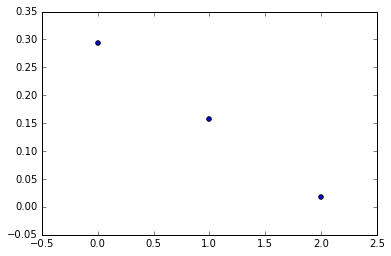

In [93]:
plt.scatter([0, 1, 2], (V*1000).tolist())

In [95]:
S.shape

(60, 60)

In [96]:
V[-1]

1.8522364711182939e-05

In [97]:
V[0]

0.00029316039671689229

In [170]:
np.array([[1, 2], [2, 3]]) / np.array([[2], [2]], dtype="float")

array([[ 0.5,  1. ],
       [ 1. ,  1.5]])

In [179]:
np.expand_dims?

In [43]:
(normalize_all(vectors) * normalize_all(vectors)).sum(axis=1)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [47]:
normalize_all(vectors)[0]

array([ 0.82577288,  0.14558663,  0.54488869])

In [46]:
vectors[0]

array([ 0.84246613,  0.14852971,  0.55590378])